# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Loading data from CSV file

In [8]:
# Load the data from the CSV file
df = pd.read_csv('../Desktop/stock_data.csv')
df

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


# Display information about the dataset

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Price                 340 non-null    float64
 1   Price Change                  340 non-null    float64
 2   Volatility                    340 non-null    float64
 3   ROE                           340 non-null    int64  
 4   Cash Ratio                    340 non-null    int64  
 5   Net Cash Flow                 340 non-null    int64  
 6   Net Income                    340 non-null    int64  
 7   Earnings Per Share            340 non-null    float64
 8   Estimated Shares Outstanding  340 non-null    float64
 9   P/E Ratio                     340 non-null    float64
 10  P/B Ratio                     340 non-null    float64
 11  cluster                       340 non-null    int32  
dtypes: float64(7), int32(1), int64(4)
memory usage: 30.7 KB
None


## Display summary statistics for the dataframe

In [14]:
print(df.describe)

<bound method NDFrame.describe of      Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0        42.349998      9.999995    1.687151  135          51     -604000000   
1        59.240002      8.339433    2.197887  130          77       51000000   
2        44.910000     11.301121    1.273646   21          67      938000000   
3        93.940002     13.977195    1.357679    9         180     -240840000   
4        55.320000     -1.827858    1.701169   14         272      315120000   
..             ...           ...         ...  ...         ...            ...   
335      33.259998     14.887727    1.845149   15         459    -1032187000   
336      52.516175     -8.698917    1.478877  142          27      159000000   
337     102.589996      9.347683    1.404206    1         100      376000000   
338      27.299999     -1.158588    1.468176    4          99      -43623000   
339      47.919998     16.678836    1.610285   32          65      272000000   

     

# Removing unnecessary columns

In [9]:
# Remove non-numeric columns
df = df.select_dtypes(include=[np.number])

# Scaling the data

In [10]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Performining K-means clustering

In [11]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_scaled)
df['cluster'] = kmeans.labels_

# Plotting the clusters

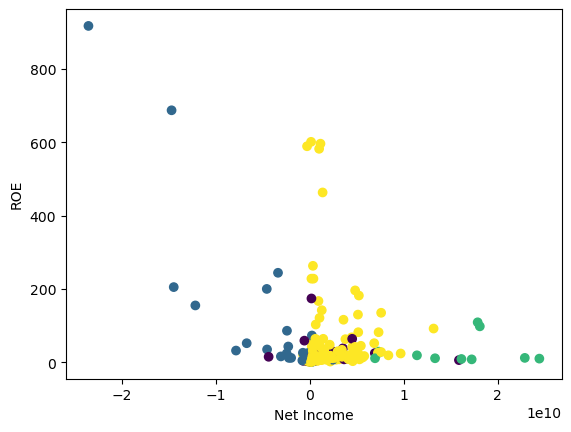

In [12]:
# Plot the clusters
plt.scatter(df['Net Income'], df['ROE'], c=df['cluster'])
plt.xlabel('Net Income')
plt.ylabel('ROE')
plt.show()